### Workflow Automation Optimization
Background:

Your business automation platform is used for streamlining various workflows, including HR
processes. A client is interested in optimizing their automated workflows to reduce processing
time and improve overall efficiency.

Task:
- Analyze the performance metrics of existing automated workflows within the platform.
- Identify bottlenecks and areas for optimization in the automated HR processes.
- Propose and implement improvements to enhance workflow automation.


#### Creating a sample dataset that includes relevant HR process metrics for evaluation. Following columns will be used:
- **ID**: Unique identifier for each workflow process.
- **Type**: Type of HR process.
- **Start Time**: Timestamp of when the process started.
- **End Time**: Timestamp of when the process ended.
- **Process Time**: Time taken to complete the process (End time - Start time).
- **Success Rate**: Percentage of sucessfully completed processes.
- **Error Rate**: Percentage of processes that encountered with errors.
- **Number of steps**: Total number of steps in the workflow.
- **Steps with Delays**: Number of steps that experienced delays.
- **Employee Satisfication Score**: Average satisfaction score from employees involved in the process.
- **Time to Hire**: Time taken to hire employees.
- **Cost per Hire**: Cost while hiring employees in Rupees.
- **Employee Retention**: Organization ability to retain its employees and reduce employees turnover rate.
- **Absenteeism Rate**: The percentage of scheduled work hours that employees are not present at their workplace.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Making sample data that is feasible for HR process in the company.**

In [138]:
data = {
    "ID": [1, 2, 3, 4, 5],
    "type": ['Recruitment', 'Onboarding', 'Training', 'Recruitment', 'Onboarding'], 
    "start_time": ['2024-01-01 08:00', '2024-01-01 09:00', '2024-01-01 10:00', '2024-01-02 08:00', '2024-01-02 09:30'],
    "end_time": ['2024-01-01 12:00', '2024-01-01 11:00', '2024-01-01 14:00', '2024-01-02 12:30', '2024-01-02 11:30'],
    "processing_time": [4, 2, 4, 4.5, 2],
    "success_rate": [95, 98, 90, 92, 97],
    "error_rate": [5, 2, 8, 8, 3],
    "number_of_steps": [10, 8, 12, 10, 8],
    "steps_with_delays": [2, 1, 3, 3, 1],
    "employee_satisfaction_score": [4.5, 4.8, 4.0, 4.2, 4.7],
    "time_to_hire": [30, 25, 35, 28, 32],
    "cost_per_hire": [15000, 20000, 22000, 18000, 21000],
    "employee_retention": [85, 90, 80, 88, 92],
    "absenteeism_rate": [2.5, 2.0, 3.0, 2.8, 1.5]
}

df = pd.DataFrame(data)

df.head()

,ID,type,start_time,end_time,processing_time,success_rate,error_rate,number_of_steps,steps_with_delays,employee_satisfaction_score,time_to_hire,cost_per_hire,employee_retention,absenteeism_rate
0,1,Recruitment,2024-01-01 08:00,2024-01-01 12:00,4.0,95,5,10,2,4.5,30,15000,85,2.5
1,2,Onboarding,2024-01-01 09:00,2024-01-01 11:00,2.0,98,2,8,1,4.8,25,20000,90,2.0
2,3,Training,2024-01-01 10:00,2024-01-01 14:00,4.0,90,8,12,3,4.0,35,22000,80,3.0
3,4,Recruitment,2024-01-02 08:00,2024-01-02 12:30,4.5,92,8,10,3,4.2,28,18000,88,2.8
4,5,Onboarding,2024-01-02 09:30,2024-01-02 11:30,2.0,97,3,8,1,4.7,32,21000,92,1.5


**Changing `start time` and `end time` to datetime format**

In [139]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [140]:
df.head()

,ID,type,start_time,end_time,processing_time,success_rate,error_rate,number_of_steps,steps_with_delays,employee_satisfaction_score,time_to_hire,cost_per_hire,employee_retention,absenteeism_rate
0,1,Recruitment,2024-01-01 08:00:00,2024-01-01 12:00:00,4.0,95,5,10,2,4.5,30,15000,85,2.5
1,2,Onboarding,2024-01-01 09:00:00,2024-01-01 11:00:00,2.0,98,2,8,1,4.8,25,20000,90,2.0
2,3,Training,2024-01-01 10:00:00,2024-01-01 14:00:00,4.0,90,8,12,3,4.0,35,22000,80,3.0
3,4,Recruitment,2024-01-02 08:00:00,2024-01-02 12:30:00,4.5,92,8,10,3,4.2,28,18000,88,2.8
4,5,Onboarding,2024-01-02 09:30:00,2024-01-02 11:30:00,2.0,97,3,8,1,4.7,32,21000,92,1.5


**Analyzing the performance metrics of existing automated workflow**

In [141]:
print("Descriptive Statistics\n")
df.describe().transpose()

Descriptive Statistics



,count,mean,min,25%,50%,75%,max,std
ID,5.0,3.0,1.0,2.0,3.0,4.0,5.0,1.581139
start_time,5,2024-01-01 18:30:00,2024-01-01 08:00:00,2024-01-01 09:00:00,2024-01-01 10:00:00,2024-01-02 08:00:00,2024-01-02 09:30:00,NaN
end_time,5,2024-01-01 21:48:00,2024-01-01 11:00:00,2024-01-01 12:00:00,2024-01-01 14:00:00,2024-01-02 11:30:00,2024-01-02 12:30:00,NaN
processing_time,5.0,3.3,2.0,2.0,4.0,4.0,4.5,1.204159
success_rate,5.0,94.4,90.0,92.0,95.0,97.0,98.0,3.361547
error_rate,5.0,5.2,2.0,3.0,5.0,8.0,8.0,2.774887
number_of_steps,5.0,9.6,8.0,8.0,10.0,10.0,12.0,1.67332
steps_with_delays,5.0,2.0,1.0,1.0,2.0,3.0,3.0,1.0
employee_satisfaction_score,5.0,4.44,4.0,4.2,4.5,4.7,4.8,0.336155
time_to_hire,5.0,30.0,25.0,28.0,30.0,32.0,35.0,3.807887


#### Exploratory Data Visualization of Performance Metrics 

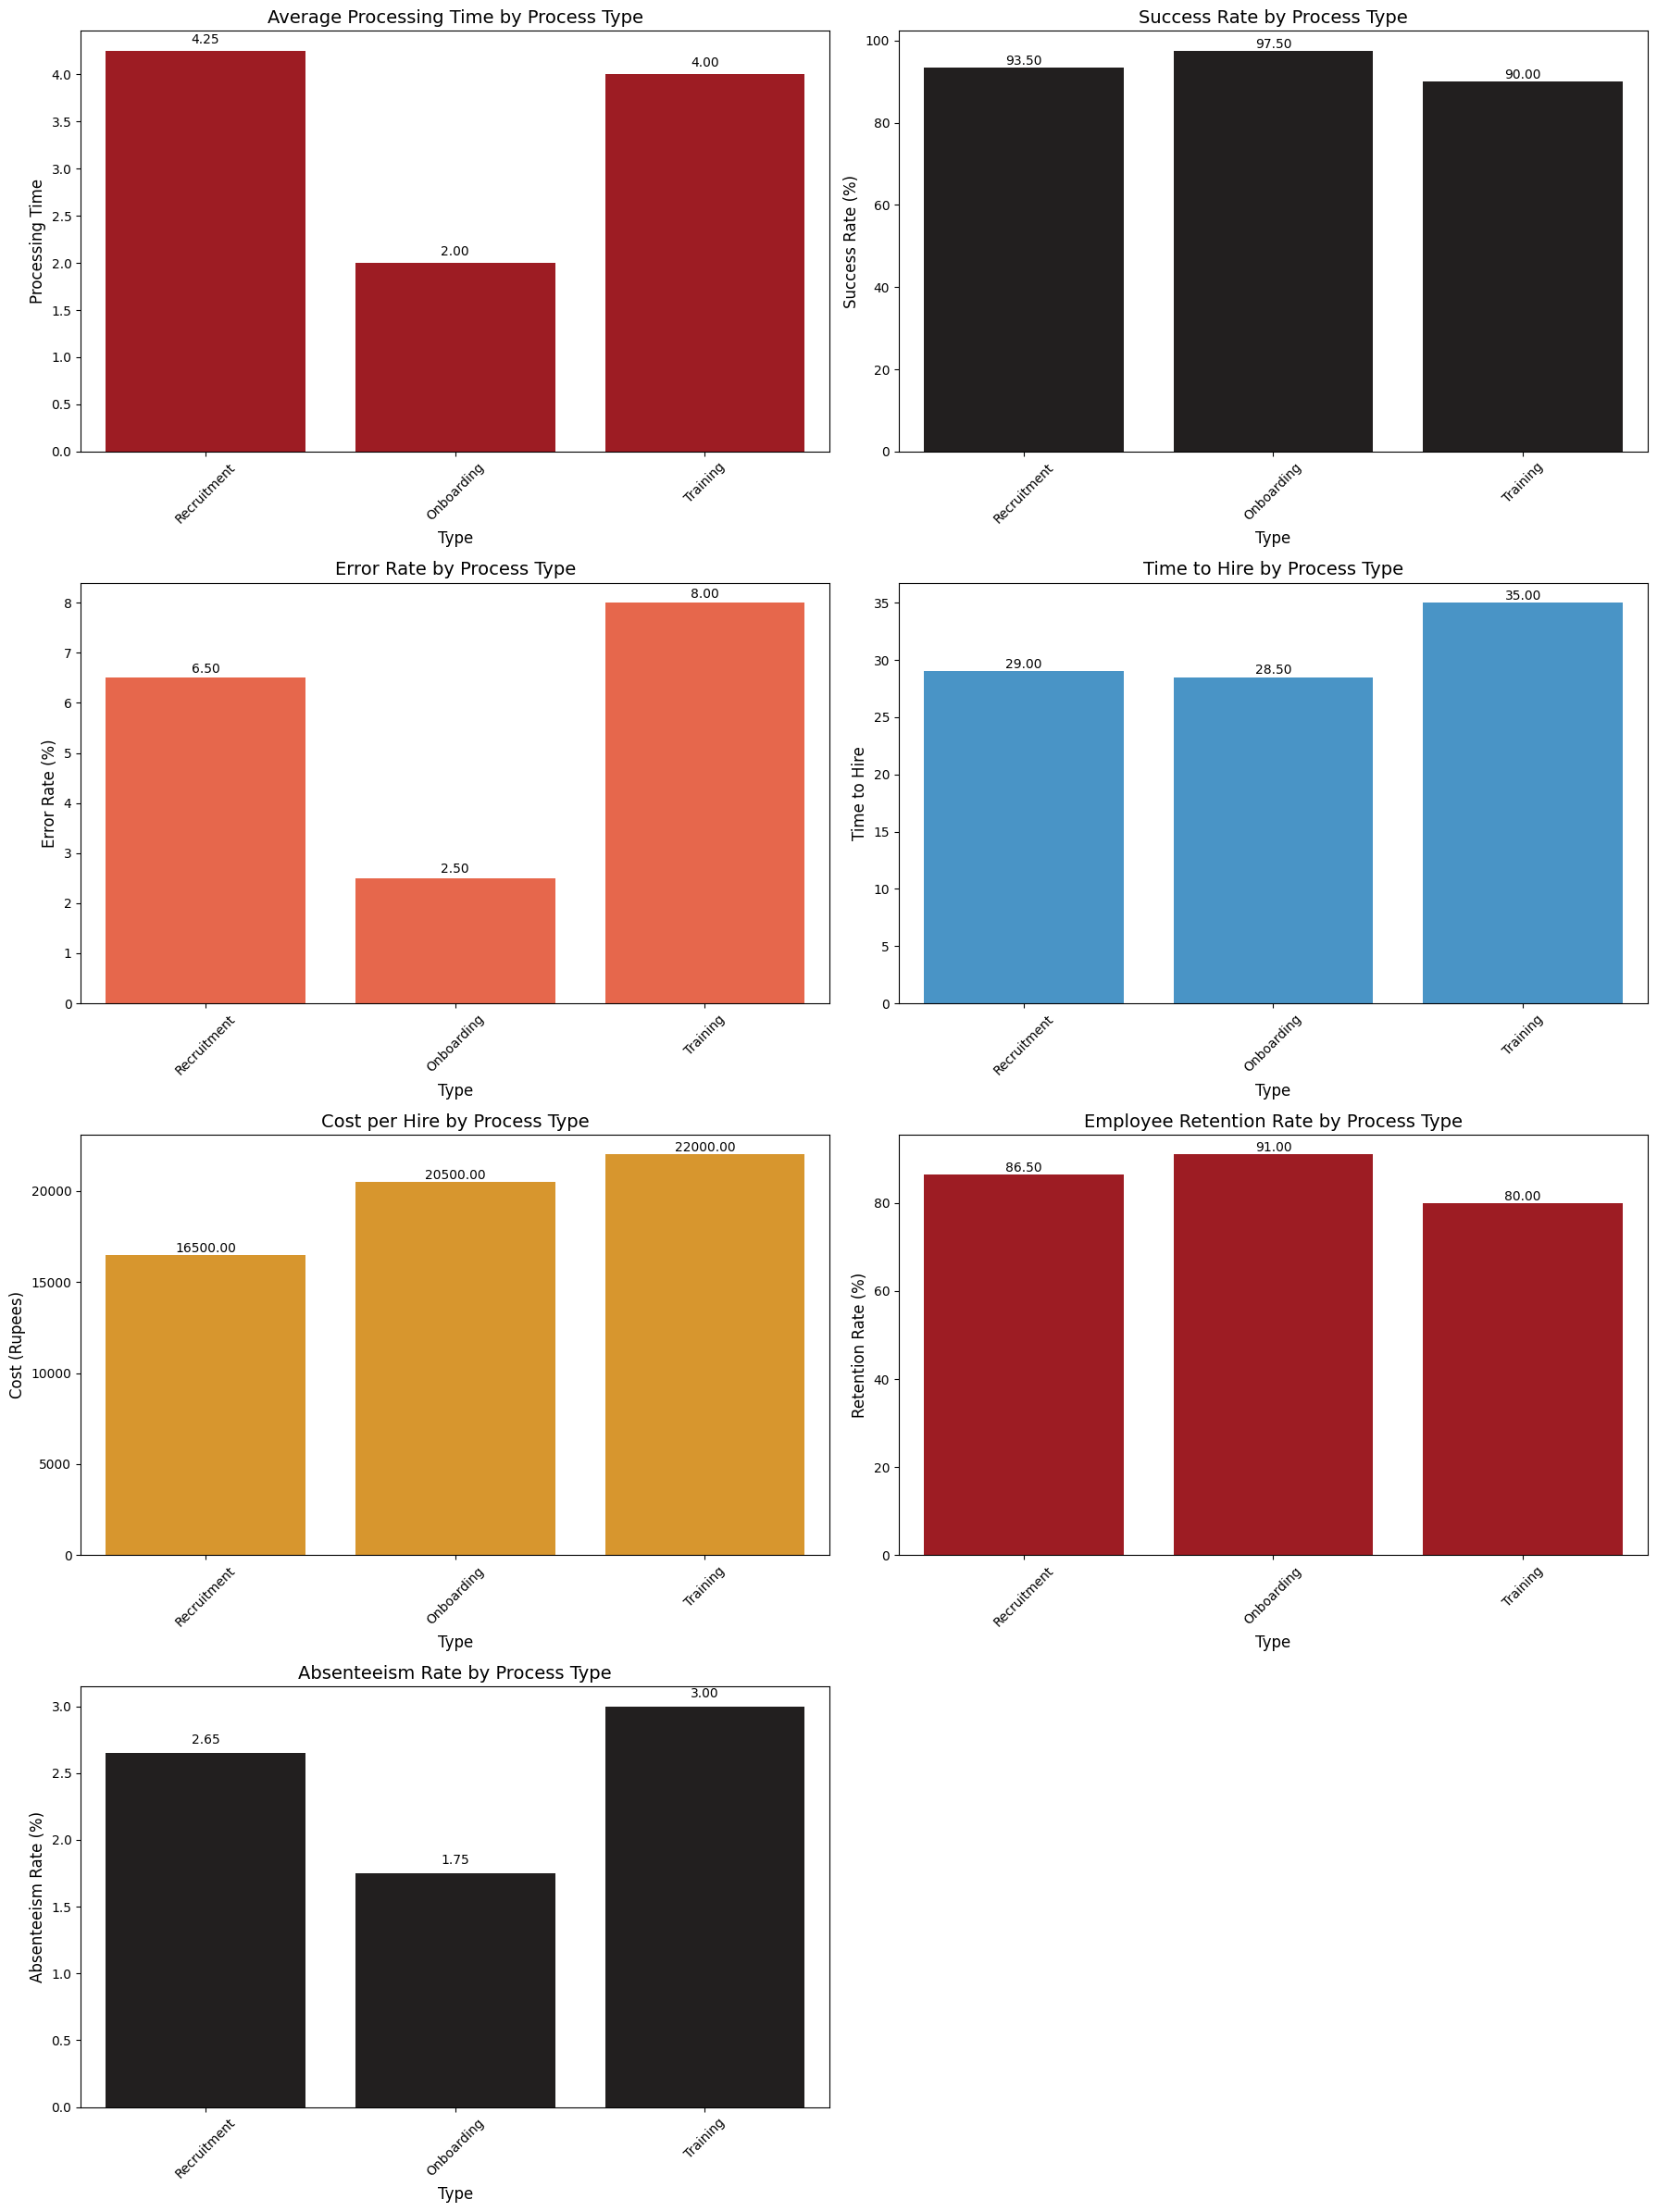

In [142]:
def plots(data, x, y, title, ylabel, xlabel, color='#1f77b4', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    else:
        fig = ax.get_figure()

    sns.barplot(data=data, x=x, y=y, color=color, errorbar=None, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

    if ax is None:
        plt.tight_layout()
        plt.show()

colors = ['#b20710', '#221f1f', '#FF5733', '#3498DB', '#F39C12']

fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# Plot 1: Average Processing Time
plots(data=df, x='type', y='processing_time', title='Average Processing Time by Process Type',
      ylabel='Processing Time', xlabel='Type', color=colors[0], ax=axes[0, 0])

# Plot 2: Success Rate
plots(data=df, x='type', y='success_rate', title='Success Rate by Process Type',
      ylabel='Success Rate (%)', xlabel='Type', color=colors[1], ax=axes[0, 1])

# Plot 3: Error Rate
plots(data=df, x='type', y='error_rate', title='Error Rate by Process Type',
      ylabel='Error Rate (%)', xlabel='Type', color=colors[2], ax=axes[1, 0])

# Plot 4: Time to Hire
plots(data=df, x='type', y='time_to_hire', title='Time to Hire by Process Type',
      ylabel='Time to Hire', xlabel='Type', color=colors[3], ax=axes[1, 1])

# Plot 5: Cost per Hire
plots(data=df, x='type', y='cost_per_hire', title='Cost per Hire by Process Type',
      ylabel='Cost (Rupees)', xlabel='Type', color=colors[4], ax=axes[2, 0])

# Plot 6: Employee Retention Rate
plots(data=df, x='type', y='employee_retention', title='Employee Retention Rate by Process Type',
      ylabel='Retention Rate (%)', xlabel='Type', color=colors[0], ax=axes[2, 1])

# Plot 7: Absenteeism Rate
plots(data=df, x='type', y='absenteeism_rate', title='Absenteeism Rate by Process Type',
      ylabel='Absenteeism Rate (%)', xlabel='Type', color=colors[1], ax=axes[3, 0])

# Hide the empty subplot in the last row and second column
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()

**Insights from the Dashboard:**
1. **Plot 1: Average Processing Time by Process Type**:
   - Recruitment and Training have significantly higher processing time compared to Onboarding.
2. **Plot 2: Sucess Rate by Process Type**:
   - All processes have high success rates, indicating effective execution despite longer processing times for some.
3. **Plot 3: Error Rate by Process Type**:
   - Training has the highest Error rate, followed by recruitment. Onboarding has the lowest error rate.
4. **Plot 4: Time to Hire by Process Type**:
   - Training has the longest time to hire, suggesting inefficiencies in the training process.
5. **Plot 5: Cost per Hire by Process Type**:
   - Training incurs the highest cost per hire,  followed by Recruitment.
6. **Plot 6: Employee Retention Rate by Process Type**:
   - Training has the lowest rentention rate, which could be linked to its higher processing time and error rate.
7. **Plot 7: Absenteeism Rate by Process Type**:
   - Training has the highest absenteeism rate, which might affect overall productivity and effieciency.


### Identification of Bottlenecks: 
#### Bottlenecks in Training:
   - **High Processing Time**: 4.00 days.
   - **High Error rate**: 8.00%
   - **Long Time to Hire**: 35 days.
   - **High cost per Hire**: NRP 22,000
   - **Low Retention Rate**: 80.00%
   - **High Absenteeism Rate**: 3.0%


#### Bottlenecks in Recruitment:
   - **High Processing Time**: 4.25 units
   - **Moderate Error Rate**: 6.50%
  

### Areas of Optimization:

#### Training:
1. **Reduce Processing Time**: Focus on streamlining workflows and automating repetitive tasks to reduce the average processing time from 4.00 days.
2. **Decrease Error Rate**: Implement error-checking mechanisms and quality controls to lower the error rate from 8.00%.
3. **Optimize Time to Hire**: Review and streamline the recruitment and onboarding processes to shorten the time to hire from 35 days.
4. **Reduce Cost per Hire**: Evaluate and optimize recruitment costs to bring down the cost per hire from NRP 22,000.
5. **Improve Retention Strategies**: Implement retention programs and improve workplace satisfaction to increase the retention rate from 80.00%.
6. **Manage Absenteeism**: Introduce policies and incentives to reduce absenteeism rates from 3.0%.

#### Recruitment:
1. **Reduce Processing Time**: Streamline the recruitment process steps to decrease the processing time from 4.25 units.
2. **Lower Error Rate Further**: Continue refining recruitment procedures to decrease the error rate further from 6.50%.

### Proposed Improvements:
#### Recruitments:
- **Chatbots**: Use chatbots for initial candidate screening and FAQs.

#### Onboarding:
- **Automated Task Management**: Use of task management tools to track and automate onboarding tasks.

#### Training:
- **E-learning Platforms**: Use platform like Coursera and Udemy for Business training.
- **Automated Assessments**: Implement tools like Quizlet or Google Forms with automated grading.


In [143]:
#### Stimulating Improvements.
df_improved = df.copy()


In [144]:

# Appling improvements for each type of process
improvements = {
    'Recruitment': {
        'processing_time': -0.5,
        'success_rate': 3.0,
        'error_rate': -1.0,
        'time_to_hire': -3.0,
        'cost_per_hire': -1000,
        'employee_retention': 2.0,
        'absenteeism_rate': -0.2
    },
    'Onboarding': {
        'processing_time': -0.3,
        'success_rate': 2.0,
        'error_rate': -0.5,
        'time_to_hire': -2.0,
        'cost_per_hire': -800,
        'employee_retention': 1.5,
        'absenteeism_rate': -0.1
    },
    'Training': {
        'processing_time': -1.0,
        'success_rate': 5.0,
        'error_rate': -2.0,
        'time_to_hire': -5.0,
        'cost_per_hire': -2000,
        'employee_retention': 5.0,
        'absenteeism_rate': -0.5
    }
}

for process, improvement in improvements.items():
    for metric, change in improvement.items():
        df_improved.loc[df_improved['type'] == process, metric] += change

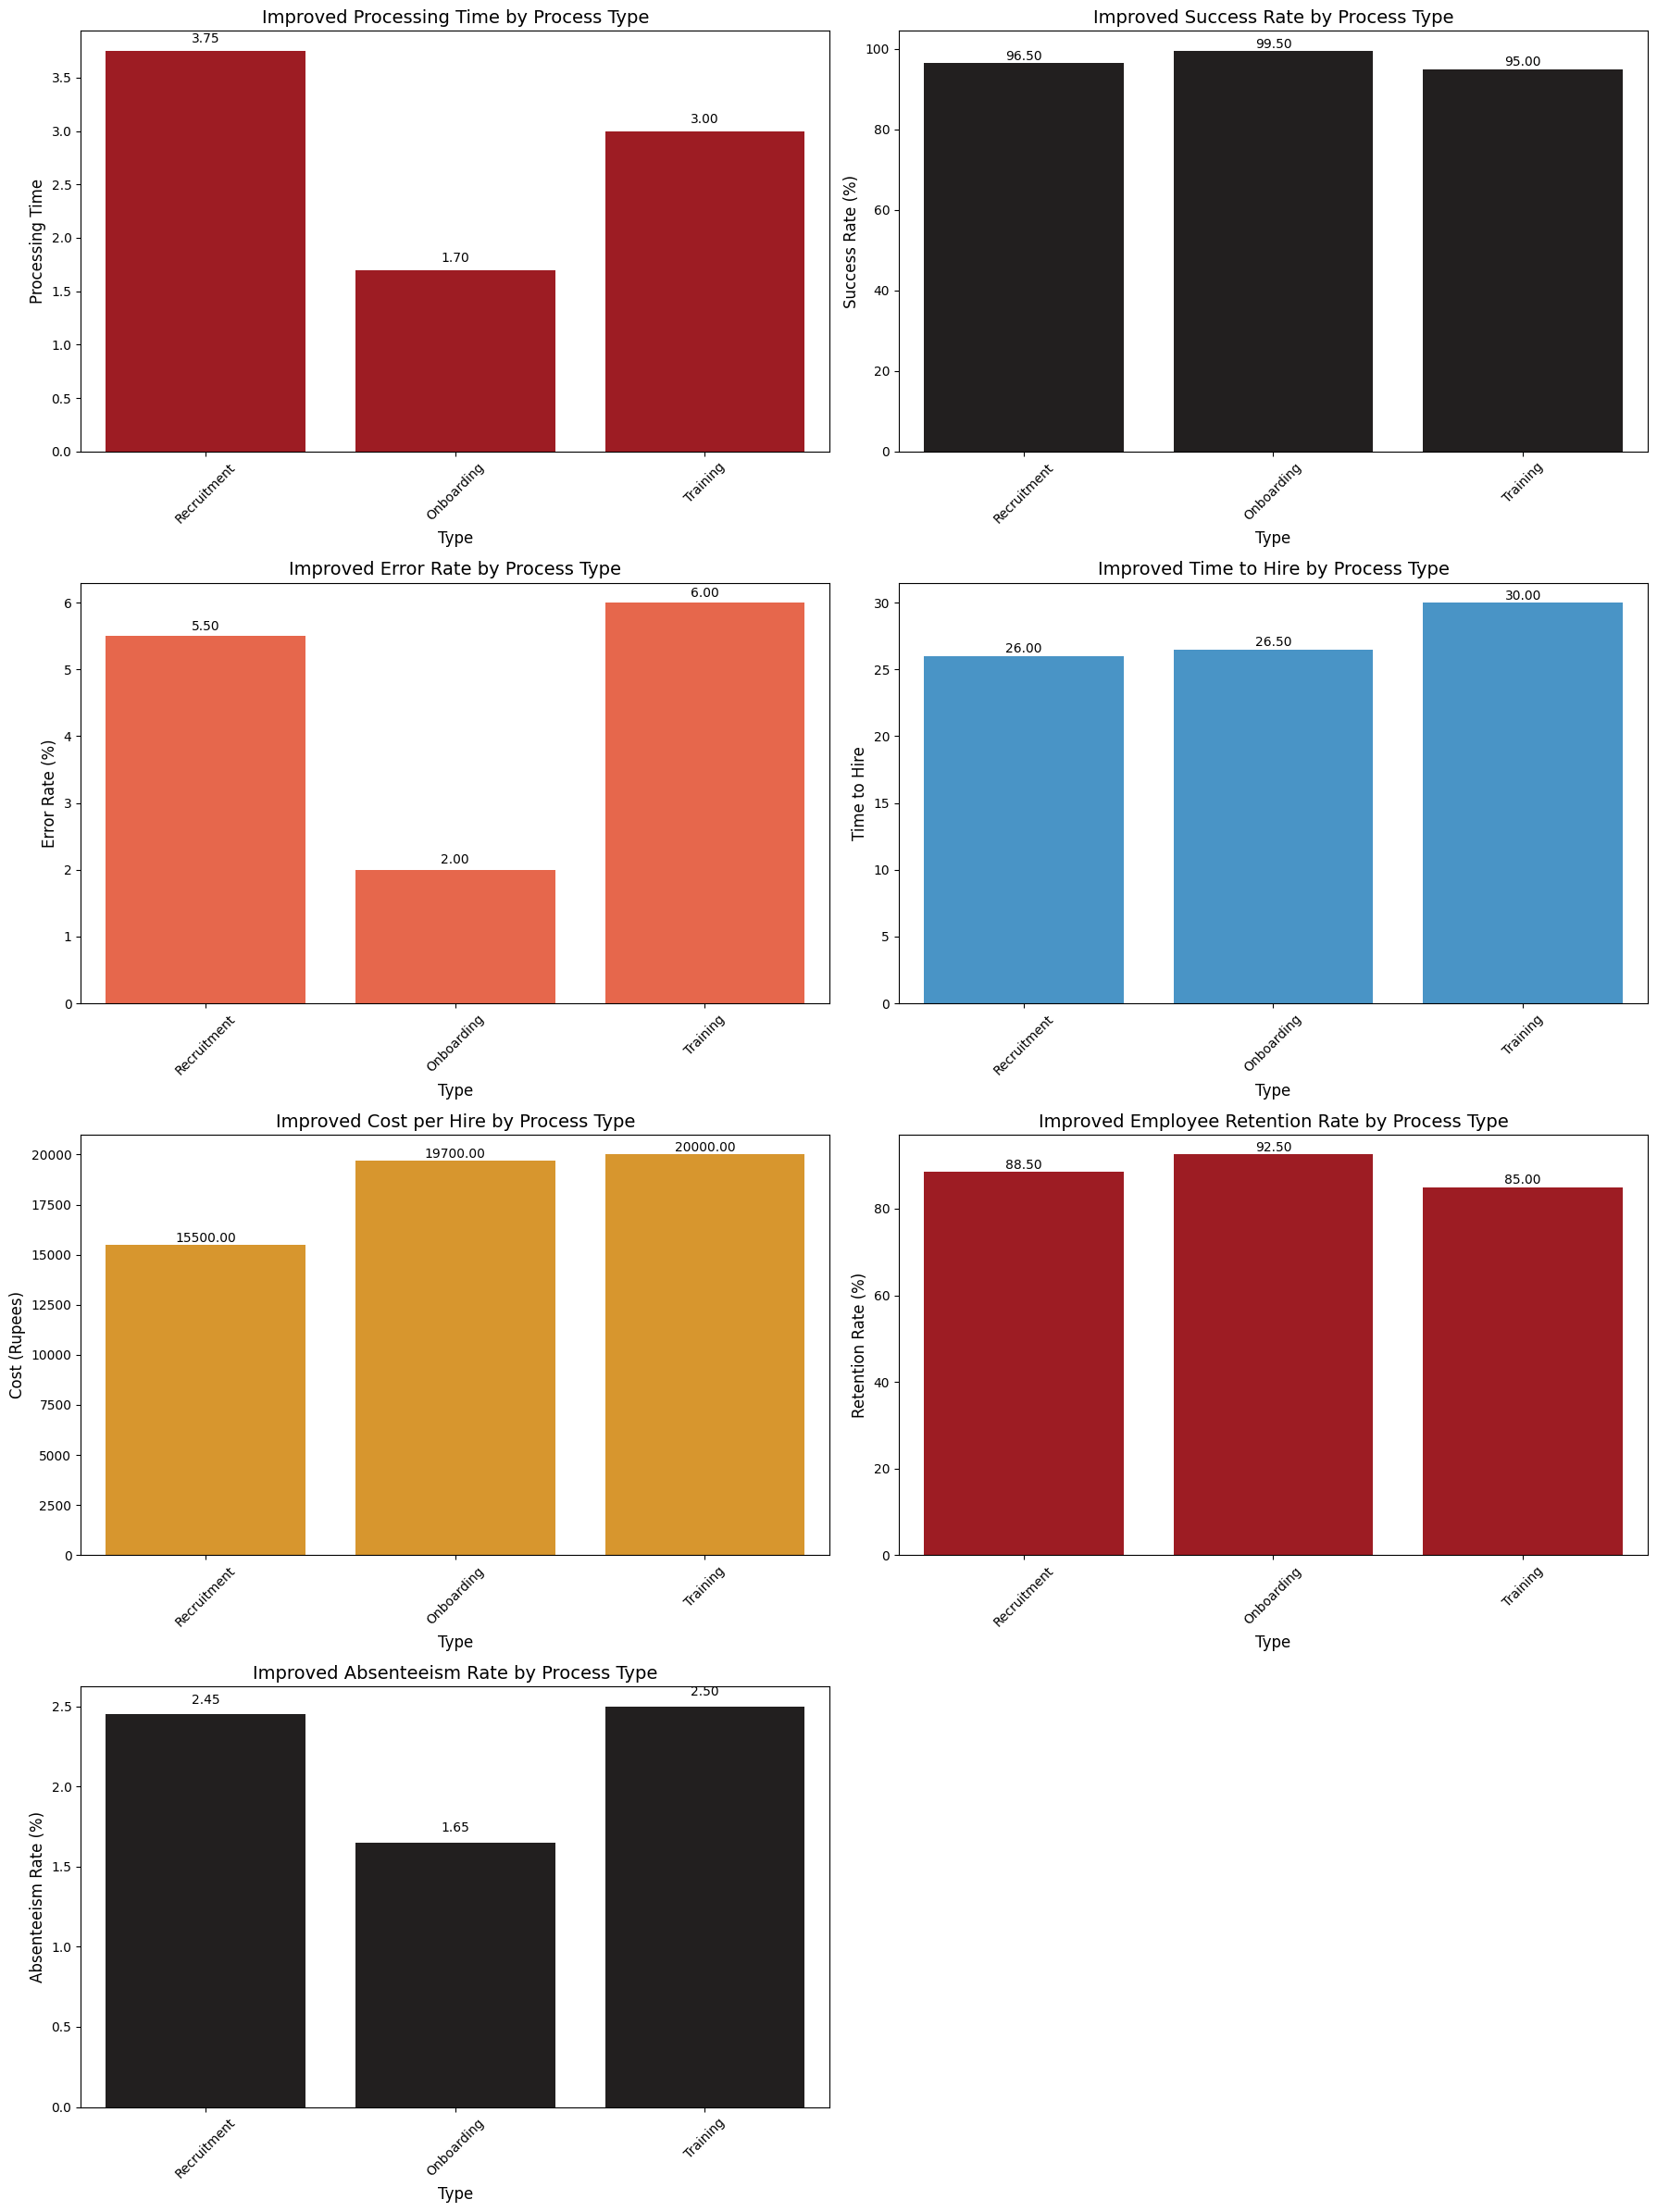

In [146]:
# Plot improved metrics
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# Plot 1: Average Processing Time
plots(data=df_improved, x='type', y='processing_time', title='Improved Processing Time by Process Type',
      ylabel='Processing Time', xlabel='Type', color=colors[0], ax=axes[0, 0])

# Plot 2: Success Rate
plots(data=df_improved, x='type', y='success_rate', title='Improved Success Rate by Process Type',
      ylabel='Success Rate (%)', xlabel='Type', color=colors[1], ax=axes[0, 1])

# Plot 3: Error Rate
plots(data=df_improved, x='type', y='error_rate', title='Improved Error Rate by Process Type',
      ylabel='Error Rate (%)', xlabel='Type', color=colors[2], ax=axes[1, 0])

# Plot 4: Time to Hire
plots(data=df_improved, x='type', y='time_to_hire', title='Improved Time to Hire by Process Type',
      ylabel='Time to Hire', xlabel='Type', color=colors[3], ax=axes[1, 1])

# Plot 5: Cost per Hire
plots(data=df_improved, x='type', y='cost_per_hire', title='Improved Cost per Hire by Process Type',
      ylabel='Cost (Rupees)', xlabel='Type', color=colors[4], ax=axes[2, 0])

# Plot 6: Employee Retention Rate
plots(data=df_improved, x='type', y='employee_retention', title='Improved Employee Retention Rate by Process Type',
      ylabel='Retention Rate (%)', xlabel='Type', color=colors[0], ax=axes[2, 1])

# Plot 7: Absenteeism Rate
plots(data=df_improved, x='type', y='absenteeism_rate', title='Improved Absenteeism Rate by Process Type',
      ylabel='Absenteeism Rate (%)', xlabel='Type', color=colors[1], ax=axes[3, 0])

# Hide the empty subplot in the last row and second column
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()

#### Measurement of Efficiency Gain

In [147]:
gains = {
    'processing_time': (df['processing_time'].mean() - df_improved['processing_time'].mean()) / df['processing_time'].mean() * 100,
    'success_rate': (df_improved['success_rate'].mean() - df['success_rate'].mean()) / df['success_rate'].mean() * 100,
    'error_rate': (df['error_rate'].mean() - df_improved['error_rate'].mean()) / df['error_rate'].mean() * 100,
    'time_to_hire': (df['time_to_hire'].mean() - df_improved['time_to_hire'].mean()) / df['time_to_hire'].mean() * 100,
    'cost_per_hire': (df['cost_per_hire'].mean() - df_improved['cost_per_hire'].mean()) / df['cost_per_hire'].mean() * 100,
    'employee_retention': (df_improved['employee_retention'].mean() - df['employee_retention'].mean()) / df['employee_retention'].mean() * 100,
    'absenteeism_rate': (df['absenteeism_rate'].mean() - df_improved['absenteeism_rate'].mean()) / df['absenteeism_rate'].mean() * 100
}

for metric, gain in gains.items():
    print(f"Efficiency gain in {metric.replace('_', ' ')}: {gain:.2f}%")

Efficiency gain in processing time: 15.76%
Efficiency gain in success rate: 3.18%
Efficiency gain in error rate: 19.23%
Efficiency gain in time to hire: 10.00%
Efficiency gain in cost per hire: 5.83%
Efficiency gain in employee retention: 2.76%
Efficiency gain in absenteeism rate: 9.32%
